In [1]:
import pandas as pd
import numpy as np
import datetime
from getting_started import *
import detect_duplicates_script as script_dd
import get_final_dataset as script_fds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = script_fds.get_final_ds(df_patient, df_pcr, './data_post_codes.csv')
# les trois premières lignes de notre dataset final
df_final[:3]

,patient_id,pcr,postcode,state,date_of_birth,age
0,653091,0,4514.0,QLD,1973-04-26,47.0
1,347667,0,4551.0,QLD,1990-03-16,30.0
2,708481,1,3199.0,VIC,1943-03-17,77.0


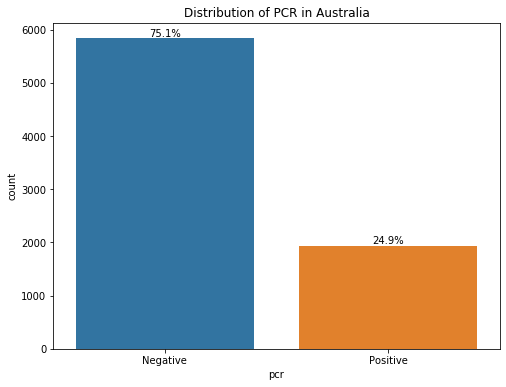

In [3]:
plt.figure(figsize=(8,6))

plt.title('Distribution of PCR in Australia')
plt.xlabel('pcr')
plt.ylabel('Count')

df_final_pcr = df_final[['pcr']]
ncount = len(df_final_pcr)
labels = ['Negative', 'Positive']
ax = sns.countplot(x="pcr", data=df_final_pcr)
ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
#
######################################################################
### Commentaire: 
# Dans la représentation graphique (diagramme en barres) ci-dessous 
# on visualise le pourcentage de tests postifs parmi la population testées 
# en Australie 

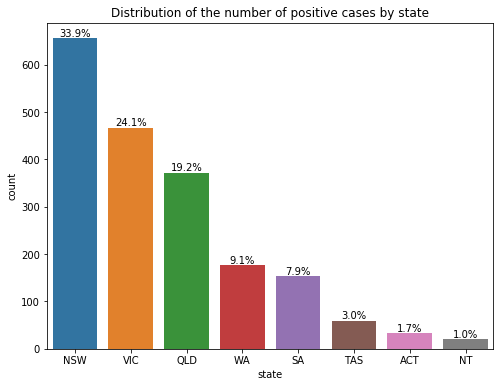

In [4]:
plt.figure(figsize=(8,6))

plt.title('Distribution of the number of positive cases by state')
plt.xlabel('pcr')
plt.ylabel('Count')

df_positive_state = df_final[['state']][df_final['pcr'] == 1]
ncount = len(df_positive_state)

ax = sns.countplot(x="state", 
                   data=df_positive_state,
                   order = df_positive_state['state'].value_counts().index)
#ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
#
######################################################################
### Commentaire:
# On se focalise ici sur la classe des patients positifs au test du Covid19
# New South Wales est la région la plus touchée en Austrlie, selon les données dont on dispose.
# Northern Territory est la région la moins touchée.

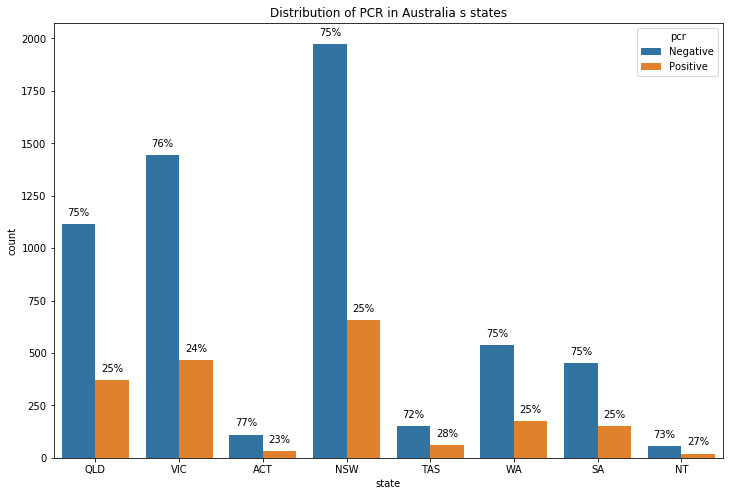

In [5]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia s states')
plt.xlabel('pcr')
plt.ylabel('Count')

df_state_pcr = df_final[['state', 'pcr']]
df_count_state_pcr = df_state_pcr.copy()
df_count_state_pcr['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_count_state_pcr['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="state", 
                   hue="pcr", 
                   #order = df_count_state_pcr['state'].value_counts().index,
                   data=df_count_state_pcr)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
#
######################################################################
### Commentaire:
# Pour approfondir notre analyse, on affiche ici:
# le pourcentage que représente le nombre de cas positifs au niveau de chaque région.
# On remaque, que l'ile de Tasmania contient le taux de contamination le plus de élevé, avec 29%.
# On remarque également le maximum du nombre de tests réalisés correspond à la région New South Wales.

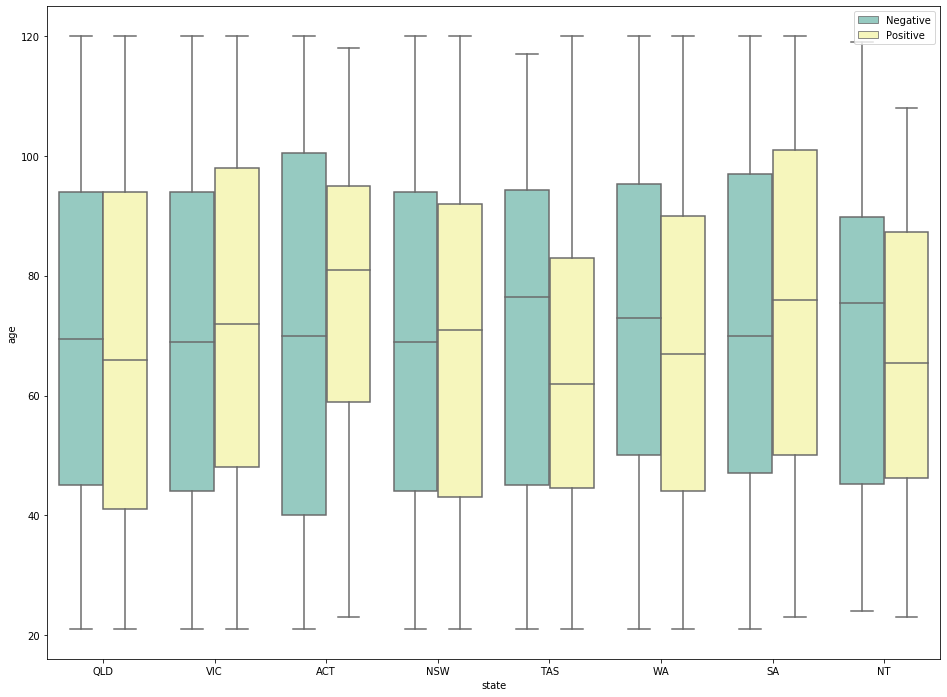

In [6]:
plt.figure(figsize=(16,12))

df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_box = df_age_state.copy()
df_age_state_box['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_state_box['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.boxplot(x="state", y="age", hue="pcr",
                 data=df_age_state_box, palette="Set3")

plt.legend(loc='upper right')
#
######################################################################
### Commentaire:
# Pour comprendre la concentration des cas postifs au Covid19 vis à vis des classes d'ages,
# nous utilisons dans un premier temps la représentation graphique en boites à moustaches.
# On remarque :
# un quart de la population contaminés est agée entre 21 et ~43 ans
# les trois quarts de la population porteurs du Virus sont agés entre ~43 et 120

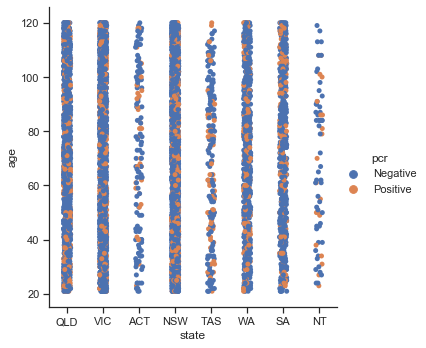

In [7]:
import seaborn as sns_cp

df_age_state_pcr = df_final[['age', 'state', 'pcr']]
df_age_state_pcr_cp = df_age_state_pcr.copy()
df_age_state_pcr_cp['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_state_pcr_cp['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True)

sns_cp.set(style="ticks", 
           color_codes=True)

sns_cp.catplot(x="state", 
               y="age",
               hue="pcr",
               data=df_age_state_pcr_cp);
#
######################################################################
### Commentaire:
# Le graphique suivant permet de montrer les concentrations d'ages 
# des personnes contaminées par le Covid19 

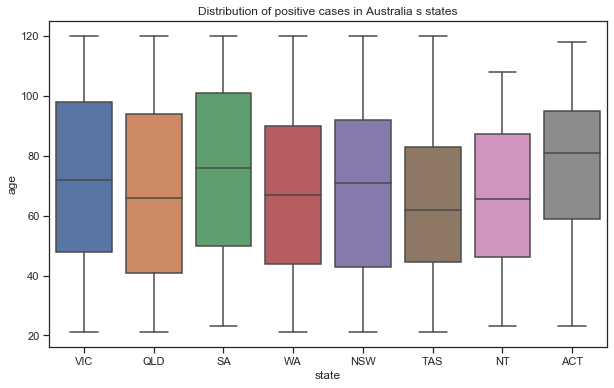

In [8]:
plt.figure(figsize=(10,6))

plt.title('Distribution of positive cases in Australia s states')
plt.xlabel('state')
plt.ylabel('age')

df_pos_age_state = df_final[['age', 'state']][df_final['pcr'] == 1]
ax = sns.boxplot(x="state", y="age", data=df_pos_age_state)
#
######################################################################
### Commentaire:
# Pour clarifier plus cet aspect, on reprend la visualisation en boîtes à moustaches,
# en restreignant sur les cas postifs au Covid19. 

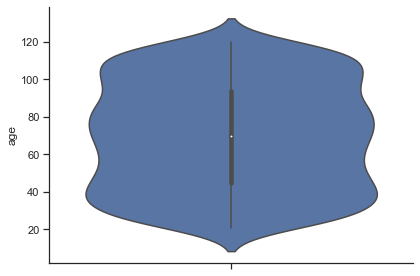

In [9]:
df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_pos = df_age_state[df_age_state["pcr"] == 1]
sns.catplot(y='age', 
            data=df_age_state_pos,
            height=4,aspect=1.5,
            kind='violin')
#
######################################################################
### Commentaire:
# Toujours dans la recherche d'une meilleur compréhension de la concentration de l'age 
# des patient contaminés par le Covid19 sur l'ensemble des régions de l'Asutralie
# On remarque une concentration importante entre ~35 ans et ~110 ans.

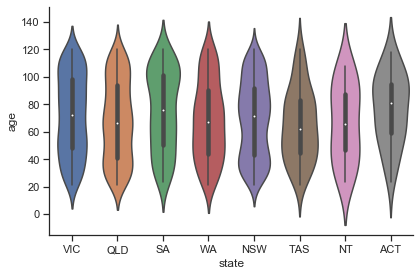

In [10]:
df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_pos = df_age_state[df_age_state["pcr"] == 1]
sns.catplot(x='state', 
            y='age', 
            data=df_age_state_pos,
            height=4,aspect=1.5,
            kind='violin')
#
######################################################################
### Commentaire:
# pour approfondir notre analyse,
# on se focalise sur se sert de la distribution du nombre de cas postifs dans chaque région de l'Australie
# via cette représentation graphique en violon.
# Dans 'South Australia' et 'Australian Capital Territory', on remarque bien une tendance d'augmentation des cas 
# avec l'avancement dans l'age.

In [11]:
# Executer SVP cette cellule avant de passer aux suivants ! 
# dataframe 
df_age_pcr_state = df_final[['age', 'pcr', 'state']]
# Catégorie d'age
df_age_category_pcr_state = df_age_pcr_state.copy()
df_age_category_pcr_state['age_category'] = 'a'

#cond_ch = df_age_category_pcr['age'] <= 14
#df_age_category_pcr.loc[cond_ch, 'age_category'] = "childhood"

cond_ad = (df_age_category_pcr_state['age'] > 14) & (df_age_category_pcr_state['age'] <= 24)
df_age_category_pcr_state.loc[cond_ad, 'age_category'] = "adolescence"

cond_ya = (df_age_category_pcr_state['age'] > 24) & (df_age_category_pcr_state['age'] <= 35)
df_age_category_pcr_state.loc[cond_ya, 'age_category'] = "young adults" 

cond_maa = (df_age_category_pcr_state['age'] > 35) & (df_age_category_pcr_state['age']<=55)
df_age_category_pcr_state.loc[cond_maa, 'age_category'] = "middle-aged adults" 

cond_oad = (df_age_category_pcr_state['age'] > 55) & (df_age_category_pcr_state['age'] <= 64)
df_age_category_pcr_state.loc[cond_oad, 'age_category'] = "older adults"

cond_oa = df_age_category_pcr_state['age'] > 64
df_age_category_pcr_state.loc[cond_oa, 'age_category'] = "old age"
#

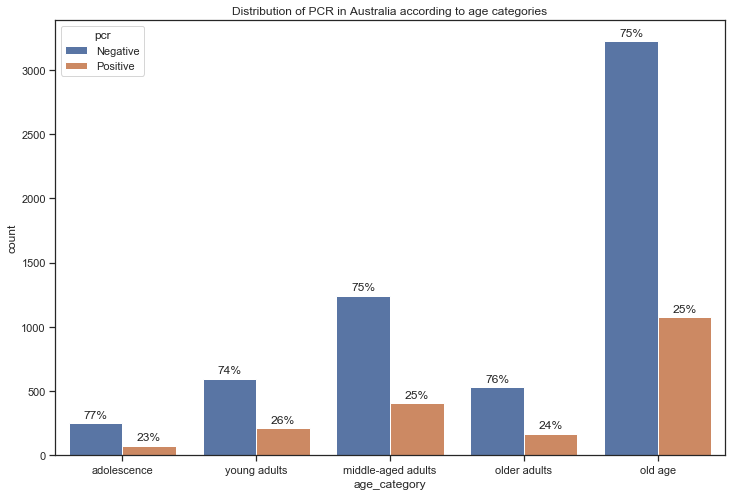

In [12]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia according to age categories')
plt.xlabel('age category')
plt.ylabel('Count')

df_age_category_pcr_state_cp = df_age_category_pcr_state.copy()

df_age_category_pcr_state_cp['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_category_pcr_state_cp['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="age_category", 
                   hue="pcr", 
                   order = ['adolescence', 'young adults', 'middle-aged adults', 'older adults', 'old age'],
                   data=df_age_category_pcr_state_cp)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
#
######################################################################
### Commentaire:
# Donc, pour finaliser notre analyse, on se focalise sur la distribution des contaminations
# selon les catégories d'ages :
# 'adolescence' = entre 14 et 24 ans ### 'young adults' = entre 25 et 35 ans ### 'middle-aged adults' = entre 36 et 55 ans
# 'older adults' = entre 56 et 64 ans # et #  'old age' = plus ou égale à 65 ans.
# On remarque un taux de contamination assez proche entre catégories d'ages, il varie entre 23% et 26%.

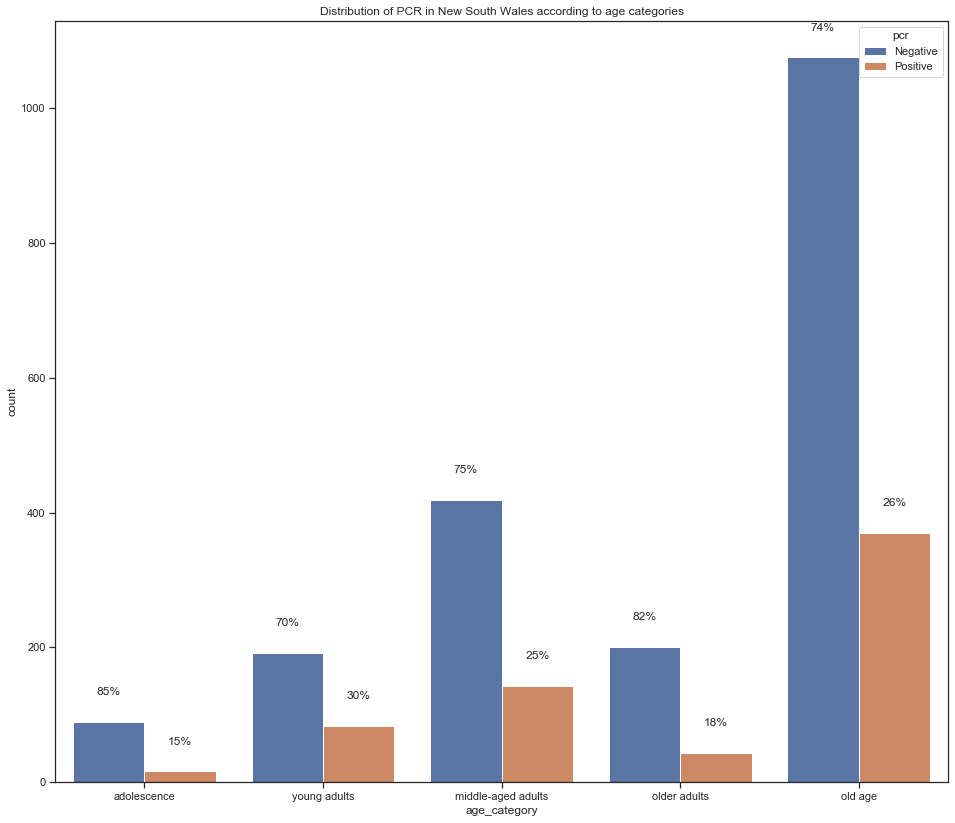

In [13]:
# restriction sur la région : New South Wales
df_age_category_pcr_nsw = df_age_category_pcr_state_cp[df_age_category_pcr_state_cp['state'] == 'NSW']
plt.figure(figsize=(16,14))

plt.title('Distribution of PCR in New South Wales according to age categories')
plt.xlabel('age category')
plt.ylabel('Count')

ax = sns.countplot(x="age_category", 
                   hue="pcr", 
                   order = ['adolescence', 'young adults', 'middle-aged adults', 'older adults', 'old age'],
                   data=df_age_category_pcr_nsw)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
#
######################################################################
### Commentaire:
# Pour vérifier la tendance remarqué dans le graphique précédent, 
# on se focalise ici  sur la région ou il y a eu le plus de tests prc réalisés (New South Wales)
# Ici on remarque une différence dans les taux de contamination observé dans les différentes catégories d'ages.
# En effet, le taux le plus élevé correspond à 'young adults' avec 30%
# suivi par les personnes agées de plus de 64 ans, avec 26%.